In [53]:
from PIL import Image
import numpy as np
from numpy import *

from sklearn import preprocessing as prep
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
import sklearn.cross_validation as crval
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_mldata
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.cross_validation import *
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import gaussian_process
from sklearn.manifold import Isomap

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pylab
import csv

import warnings
warnings.filterwarnings("ignore")

In [35]:
def test_and_answers(solver, test):
    print solver
    print shape(test)
    accuracy = solver.predict(test)
    print 'Saving answers...'
    fp=open('answers.txt','w')
    fp.write('Point_ID,Output\n')
    i=1
    for a in accuracy:
        #fp.write(str(i)+','+a+'\n')
        fp.write(str(i)+','+a)
        i+=1
    fp.close()
    print 'Done.'

In [4]:
#LOADING DATA ..... 

#X=[]
#with open('x_tr.csv','r') as f:
#    reader = csv.reader(f)
#    for row1 in reader:
#        X.append(row1)
#print (len(X))
#y=[]
#with open('y_tr.csv','r') as f:
#    reader = csv.reader(f)
#    for row1 in reader:
#        y.append(row1)
#print (len(y))
    
X=[]
fp=open('class_train_in.csv','r')
trash=fp.readline()
#print trash
lines=fp.readlines()
# print lines[0]
for line in lines:
    data=line.split(',')
    cleaned_data=data[1:len(data)]
    X.append(cleaned_data)
print shape(X)

      
y=[]
fp=open('class_train_out.csv','r')
trash=fp.readline()
#print trash
lines=fp.readlines()
# print lines[0]
for line in lines:
    data=line.split(',')
    cleaned_data=data[1:len(data)]
    y.append(cleaned_data)
print shape(y)
    
    
X_test=[]
fp=open('class_test_in.csv','r')
trash=fp.readline()
lines=fp.readlines()
for line in lines:
    data=line.split(',')
    cleaned_data=data[1:len(data)]
    X_test.append(cleaned_data)
print shape(X_test)
    

(1962, 265)
(1962, 1)
(1963, 265)


In [5]:
# SET UP DATA ARRAYS
X=np.asarray(X)
X=X.astype(np.float)
X=np.ravel(X)
X= X.reshape(1962, 265)
print shape(X)

y=np.asarray(y)
y=np.ravel(y).reshape(1962, 1)
print shape(y)

X_test=np.asarray(X_test)
X_test=X_test.astype(np.float)
X_test=np.ravel(X_test)
X_test= X_test.reshape(1963, 265)
print shape(X_test)



(1962, 265)
(1962, 1)
(1963, 265)


In [6]:
#NORMALIZING DATA
print 'X train:'
std_scal=prep.StandardScaler()
X_scaled=std_scal.fit_transform(X)
print('it had mean: ' +str(mean(X))+' and std:'+ str(std(X)))
print('NOW it has mean: '+str(mean(X_scaled))+' and std: '+str(std(X_scaled)))

X_tr = X_scaled #normalized training data
y_tr = y


print 'X test:'
selX=X_test
std_scal=prep.StandardScaler()
selX_scaled=std_scal.fit_transform(selX)
print('it had mean: ' +str(mean(selX))+' and std:'+ str(std(selX)))
print('NOW it has mean: '+str(mean(selX_scaled))+' and std: '+str(std(selX_scaled)))

X_test = selX_scaled #normalized testing data

X train:
it had mean: 93.6561498663 and std:24634.8063775
NOW it has mean: -7.3728733857e-18 and std: 1.0
X test:
it had mean: 93.7580887936 and std:24628.007464
NOW it has mean: -1.45060291886e-17 and std: 1.0


In [7]:
# SHUFFLE AND SPLIT
print('SHUFFLE: Lets mess up things a little bit')
selX_scaled=X
sely=y
indexes=[]
shuffly=y
shufflX=X
# assign an id to each sample
for i in range(len(sely)):
    indexes.append(i)
# shuffle idxs
np.random.shuffle(indexes)
# build X and y shuffled
for i in range(len(indexes)):
    shuffly[i]=sely[i]
    shufflX[i, :]= selX_scaled[i,:]
print('total matrix of data:'+str(shape(shufflX)))


print('SPLIT: create of train/test/val sets')
trainData, valData, trainLab, valLab = crval.train_test_split(shufflX, shuffly, test_size=0.2)

#trainData, valData, trainLab, valLab = crval.train_test_split(shufflX, shuffly, test_size=0.2)
#print(shape(otherData))
print('Done. Here the sizes: ')
print('Train: '+str(shape(trainData))+';\tVal: '+str(shape(valData)))



SHUFFLE: Lets mess up things a little bit
total matrix of data:(1962, 265)
SPLIT: create of train/test/val sets
Done. Here the sizes: 
Train: (1569, 265);	Val: (393, 265)


(1569, 7)


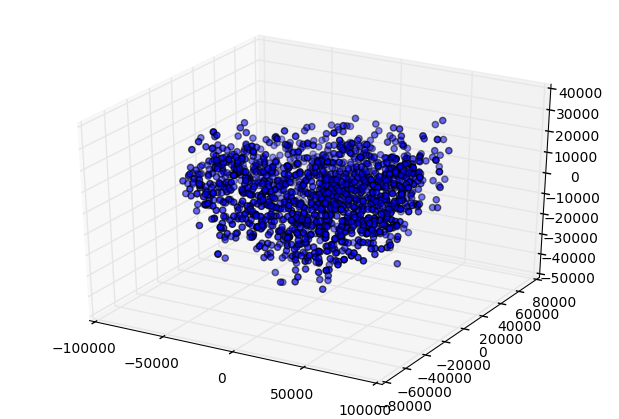

In [62]:
# PLOT DATA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#kpca = KernelPCA(n_components=7, kernel='cosine')
##kpca.fit(trainData)
#Xtransf = kpca.fit_transform(trainData)


isomap = Isomap(n_neighbors=10, n_components=7, eigen_solver='auto', path_method='D', neighbors_algorithm='kd_tree')
#path_method : string [‘auto’|’FW’|’D’]
#neighbors_algorithm : string [‘auto’|’brute’|’kd_tree’|’ball_tree’]
Xtransf = isomap.fit_transform(trainData)


print shape(Xtransf)
Xcoord = Xtransf[:,0]
Ycoord = Xtransf[:,1]
Zcoord = Xtransf[:,2]

fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(Xcoord, Ycoord, Zcoord, zorder=0.3)
#scatter(Xpca, Ypca, Zpca)
ax.hold(True)
#ax.scatter(means[:,0], means[:,1], means[:,2], color='green', s=5000, zorder=0.5)
plt.show()

In [20]:
# LINEAR SVC, RBF

#trainData, valData, trainLab, valLab = crval.train_test_split(shufflX, shuffly, test_size=0.2)
#alltrainData=trainData
#alltrainLab=trainLab
#print('Lets subsample the datasets, we do not have that much time')
#trainData, rubbishData, trainLab, rubbishLab= crval.train_test_split(trainData, trainLab, test_size=0.9)
#valData, rubbishData, valLab, rubbishLab= crval.train_test_split(valData, valLab, test_size=0.9)
#print('Train: '+str(shape(trainData)))
#print('Test: '+str(shape(testData)))
#print('Val: '+str(shape(valData)))
#countall(trainLab)

print('Time to grid-search!')
print('Range C: [2^-5,2^11]')
print('Range gamma: [2^-15, 2^3]')

accuracies=[]
best_choice_c=-5
best_choice_g=-15
old_accuracy=0
for ge in range(-15, 5, 2):
    g = pow(2,ge)
    for e in range(-5, 13, 2):
        c=pow(2,e)
        cls = SVC(C=c, kernel='rbf', gamma=g)
        cls.fit(trainData, trainLab)
        accuracy = cls.score(valData, valLab)
        #accuracy_kfold = cross_val_score(cls, valData, valLab, cv=5)
        #print accuracy_kfold
        #accuracy = np.sum(accuracy_kfold)
        #print np.sum(accuracy_kfold)
        if old_accuracy < accuracy:
            old_accuracy=accuracy
            best_choice_c=e
            best_choice_g=ge
        accuracies.append(accuracy)
        #plt.scatter(2**e,accuracy,color='c')
        print('Accuracy for c= 2^'+ str(e) + ' gamma= 2^'+str(ge)+':   ' + str(accuracy*100) +'%')
print('We will use c= 2^'+str(best_choice_c)+' and gamma= 2^'+str(best_choice_g)+'   '+str(old_accuracy))

c=pow(2,best_choice_c)
g=pow(2,best_choice_g)
cls = SVC(C=c, kernel='rbf', gamma=g)
cls.fit(alltrainData, alltrainLab)
#accuracy = cls.score(testData, testLab)
print('Getting back to the whole datasets: ')
print('Training with the c and gamma best performing values found')
#print ('Accuracy: '+str(accuracy*100)+'%')
#LOAD TEST SET, Compute predictions, save them on a csv

Time to grid-search!
Range C: [2^-5,2^11]
Range gamma: [2^-15, 2^3]
Accuracy for c= 2^-5 gamma= 2^-15:   47.8371501272%
Accuracy for c= 2^-3 gamma= 2^-15:   47.8371501272%
Accuracy for c= 2^-1 gamma= 2^-15:   47.8371501272%
Accuracy for c= 2^1 gamma= 2^-15:   54.1984732824%
Accuracy for c= 2^3 gamma= 2^-15:   54.9618320611%
Accuracy for c= 2^5 gamma= 2^-15:   55.9796437659%
Accuracy for c= 2^7 gamma= 2^-15:   56.2340966921%
Accuracy for c= 2^9 gamma= 2^-15:   57.5063613232%
Accuracy for c= 2^11 gamma= 2^-15:   62.8498727735%
Accuracy for c= 2^-5 gamma= 2^-13:   47.8371501272%
Accuracy for c= 2^-3 gamma= 2^-13:   47.8371501272%
Accuracy for c= 2^-1 gamma= 2^-13:   54.1984732824%
Accuracy for c= 2^1 gamma= 2^-13:   54.1984732824%
Accuracy for c= 2^3 gamma= 2^-13:   55.9796437659%
Accuracy for c= 2^5 gamma= 2^-13:   59.0330788804%
Accuracy for c= 2^7 gamma= 2^-13:   63.6132315522%
Accuracy for c= 2^9 gamma= 2^-13:   65.1399491094%
Accuracy for c= 2^11 gamma= 2^-13:   67.4300254453%
Accura

KeyboardInterrupt: 

In [11]:
# LINEAR SVC, POLYNOMIAL

#from sklearn.metrics import fbeta_score, make_scorer
#ftwo_scorer = make_scorer(fbeta_score, beta=2)
#from sklearn.cross_validation import *
#scores = cross_val_score(cls, alltrainData, alltrainLab, cv=5)
#print scores

print('Time to grid-search!')
print('Range C: [2^-5,2^11]')
print('Range gamma: [2^-15, 2^3]')

accuracies=[]
best_choice_c=-5
best_choice_g=-15
old_accuracy=0
order=2
for ge in range(2, 6, 1):
    g = pow(2,ge)
    ge=order
    for e in range(-1, 5, 1):
        c=pow(2,e)
        cls = SVC(C=c, kernel='poly', degree=ge)
        cls.fit(trainData, trainLab)
        accuracy = cls.score(valData, valLab)
        #accuracy_kfold = cross_val_score(cls, valData, valLab, cv=5)
        #print accuracy_kfold
        #accuracy = np.sum(accuracy_kfold)
        #print np.sum(accuracy_kfold)
        if old_accuracy < accuracy:
            old_accuracy=accuracy
            best_choice_c=e
            best_choice_g=ge
        accuracies.append(accuracy)
        #plt.scatter(2**e,accuracy,color='c')
        print('Accuracy for c= 2^'+ str(e) + ' gamma= 2^'+str(ge)+':   ' + str(accuracy*100) +'%')
print('We will use c= 2^'+str(best_choice_c)+' and gamma= 2^'+str(best_choice_g)+'   '+str(old_accuracy))

c=pow(2,best_choice_c)
g=pow(2,best_choice_g)
cls = SVC(C=c, kernel='rbf', gamma=g)
cls.fit(alltrainData, alltrainLab)
#accuracy = cls.score(testData, testLab)
print('Getting back to the whole datasets: ')
print('Training with the c and gamma best performing values found')
#print ('Accuracy: '+str(accuracy*100)+'%')
#LOAD TEST SET, Compute predictions, save them on a csv






Time to grid-search!
Range C: [2^-5,2^11]
Range gamma: [2^-15, 2^3]


NameError: name 'trainData' is not defined

In [ ]:
C=pow(2,1)
g=pow(2,-7)
cls = SVC(C=C, kernel='linear', gamma=g)
cls.fit(trainData, trainLab)
accuracy = cls.score(valData, valLab)
print accuracy

#accuracy = cls.predict(X_test)


In [6]:
fp=open('answers.txt','w')
fp.write('Point_ID,Output\n')
i=1
for a in accuracy:
    fp.write(str(i)+','+a+'\n')
    i+=1
fp.close()

NameError: name 'accuracy' is not defined

In [13]:
# LINEAR SVC
print('Range C: [2^5,2^11]')
best_choice=-5
old_accuracy = 0
for e in range(5, 11, 2):
    c=pow(2,e)
    #print(old_accuracy)
    cls = LinearSVC(C=c)
    cls.fit(trainData, trainLab)
    accuracy = cls.score(valData, valLab)
    if old_accuracy<accuracy:
        old_accuracy=accuracy
        best_choice=e
    print('Accuracy for c= 2^'+ str(e) + ' :   ' + str(accuracy*100) +'%')
print('Best choice, at this moment: 2^' +str(best_choice))
print('It seems that c= 2^'+str(best_choice)+' works best, maybe we can try shifting the interval a little bit..' )
left=best_choice-5
right=best_choice+5
print('Range C: [2^'+str(left)+',2^'+str(right)+']')
i=0
accuracies=[0, 0, 0, 0, 0, 0, 0, 0, 0]
x = np.linspace(-15, 3, num=9, endpoint=True)
#print(shape(x))
#print(shape(accuracies))
for e in range(best_choice-5, best_choice+5, 2):
    c=pow(2,e)
    #print(c)
    cls = LinearSVC(C=c)
    cls.fit(trainData, trainLab)
    accuracy = cls.score(valData, valLab)
    #accuracy_kfold = cross_val_score(cls, valData, valLab, cv=5)
    print accuracy_kfold
    #print np.norm(accuracy_kfold)
    if old_accuracy < accuracy:
        old_accuracy=accuracy
        best_choice=e
    accuracies[i]=accuracy
    i+=1
    #plt.scatter(2**e,accuracy,color='c')
    print('Accuracy for c= 2^'+ str(e) + ' :   ' + str(accuracy*100) +'%')
print('Yes! Our intuition was good. We will use c= 2^'+str(best_choice))

#xnew = np.linspace(best_choice-5, best_choice-5, num=9, endpoint=True)
#f=interp1d(x,accuracies)
#plt.plot(xnew, f(xnew), '-')
#plt.grid(True)
#plt.show()

#c=pow(2,best_choice)
#cls = LinearSVC(C=c)
#cls.fit(trainData, trainLab)
#accuracy = cls.score(testData, testLab)
#print('Testing now the SVM with c= 2^'+str(best_choice)+' on testingDataset')
#print('Accuracy: '+ str(accuracy*100) +'%')

Range C: [2^5,2^11]


NameError: name 'trainData' is not defined

In [2]:
from sklearn.gaussian_process import *
#gp = gaussian_process.GaussianProcess(theta0=1e-2, thetaL=1e-4, thetaU=1e-1)
GPclassifier = gaussian_process.GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
GPclassier.fit(trainData, trainLab)
accuracy = GPclassifier.score(valData, valLab)

NameError: name 'GaussianProcessClassifier' is not defined

In [8]:
#DECISION TREES

print('Train: '+str(shape(trainData)))
print('Val: '+str(shape(valData)))

clf = tree.DecisionTreeClassifier()
clf = clf.fit(trainData, trainLab)
accuracy = clf.score(valData, valLab)
print (accuracy)

Train: (1569, 265)
Val: (393, 265)
0.648854961832


In [9]:
#GRADIENT BOOSTING TREES

clf = GradientBoostingClassifier()
clf = clf.fit(trainData, trainLab)
accuracy = clf.score(valData, valLab)
print (accuracy)

0.666666666667


In [10]:
#RADIUS NEAREST NEIGHBORS 

print('Train: '+str(shape(trainData)))
print('Val: '+str(shape(valData)))

n_neighbors=14
weights='distance' #otherwise 'uniform'
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(trainData, trainLab)

accuracy = clf.score(valData, valLab)
print (accuracy)

#accuracy = clf.predict(X_test)

#accuracy valSet 77.86 -- bingo! weights=distance, 14nn ?
#weights=uniform, 14nn: val 69.97
#weights=uniform, 15nn: val 70.74
#weights=distance, 10nn: val 73.79
#weights=distance, 14nn: val 76.84
#weights=distance, 15nn: val 74.30


Train: (1569, 265)
Val: (393, 265)
0.788804071247


In [37]:
# PCA + NEAREST NEIGHBOUR

##from teapot
#exported_pipeline = make_pipeline(
#    make_union(VotingClassifier([("est", LogisticRegression(C=50.0, dual=False, penalty="l1"))]), FunctionTransformer(lambda X: X)),
#    PCA(iterated_power=10, svd_solver="randomized"),
#    SelectPercentile(percentile=11, score_func=f_classif),
#    KNeighborsClassifier(n_neighbors=5, weights="distance")
#)
#exported_pipeline.fit(training_features, training_classes)
##results = exported_pipeline.predict(testing_features)
#accuracy = exported_pipeline.predict(testing_features)
#i=1
##print('Point_ID, Output')
##for res in results:
##    print(str(i)+','+str(int(res)))
##    i+=1



# ------- PCA
#pca = PCA(n_components=20, svd_solver="randomized")
pca = PCA(n_components=7)
pca.fit(trainData)
print(pca.explained_variance_ratio_)
Xpca = pca.transform(trainData)
valpca = pca.transform(valData)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xpca, trainLab) 
#knn.predict(X_test)
accuracy = knn.score(valpca, valLab)
print (accuracy)
#print(knn.predict_proba(valData))


# PCA 10 comp, 5nn: acc val=80.92
# PCA 7 comp, 5nn: acc val=81.68
# PCA 5 comp, 20nn: acc val=81.17


Xtepca = pca.transform(X_test)
#test_and_answers(knn, Xtepca) #comment if not testing


[ 0.16085986  0.09992628  0.0854601   0.03853392  0.01961913  0.01504409
  0.0143142 ]
0.81679389313
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
(1963, 7)
Saving answers...
Done.


In [ ]:
# ------- incremental PCA
ipca = IncrementalPCA(n_components=3)
ipca.fit(trainData)
print(ipca.explained_variance_ratio_)
Xipca = ipca.transform(trainData)
valipca = ipca.transform(valData)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(Xipca, trainLab) 
#knn.predict(valData)
accuracy = knn.score(valipca, valLab)
print (accuracy)
#print(knn.predict_proba(valData))

In [109]:
# ------- kernel PCA
nn = range(5,21,3)
kernels = ['linear', 'rbf', 'poly', 'sigmoid', 'cosine']
components = range(3, 31, 3)

nn = range(10,11,1)
kernels = ['cosine']
components = range(10,11,1)

#fp=open('results_kernelPCA.txt','w')
#fp.write('nn,kernel,pc,acc\n')


for n in nn:
    print (str(n)+' nearest neighbours')
    for k in kernels:
        for c in components:
            kpca = KernelPCA(n_components=c, kernel=k)
            kpca.fit(trainData)
            #print(kpca.explained_variance_ratio_)
            Xkpca = kpca.transform(trainData)
            valipca = kpca.transform(valData)

            knn = KNeighborsClassifier(n_neighbors=n)
            knn.fit(Xkpca, trainLab) 
            #accuracy = knn.score(valipca, valLab)
            #print ('kernel '+k+', '+str(c)+' PC, acc = '+str(accuracy))
            #fp.write(str(n)+','+k+','+str(c)+','+str(accuracy)+'\n')
            
            testkpca = kpca.transform(X_test)
            accuracy = knn.predict(testkpca)
            print ('kernel: '+k+', '+str(c)+' PC')
            
            
print ('Done.')
#fp.close()

10 nearest neighbours
kernel: matplotlibcosine, 10 PC
Done.
